# 3D image filtering
pyclesperanto has a couple of image processing filters built-in for noise removal and background subtraction.

In [1]:
from skimage.io import imread
from skimage.data import cells3d
import pyclesperanto as cle

# We select the GPU with "RTX" in the name
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

In [2]:
cle.__version__
print(cells3d().shape)

(60, 2, 256, 256)


We first load an example image and print out its dimensionality.

In [3]:
image = cells3d()[:, 0]
print(image.shape, image.dtype)

(60, 256, 256) uint16


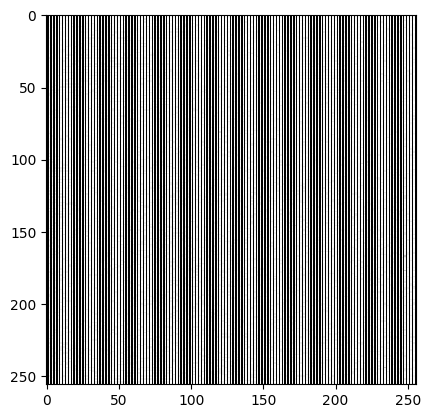

In [4]:
cle.imshow(image)

## Noise removal
There are some noise removal filters available which typically allow tuning the size of the filter kernel in three dimensions independently.

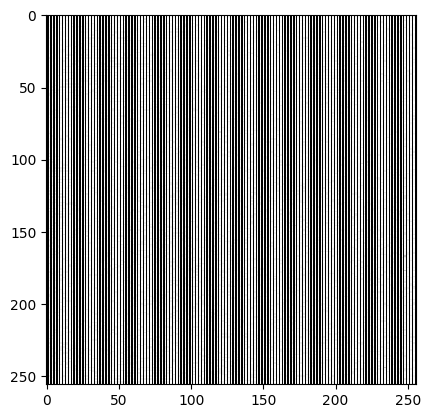

In [5]:
blurred_x = cle.gaussian_blur(image, sigma_x=0)
cle.imshow(blurred_x)

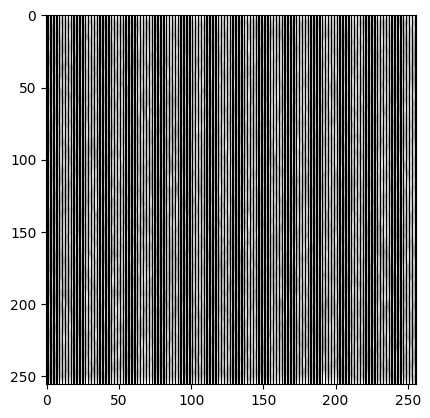

In [6]:
blurred_y = cle.gaussian_blur(image, sigma_y=4)
cle.imshow(blurred_y)

In the microscopy image processing context it is recommended to use the same filter size in all directions if the pixels/voxels are [isotropic](https://en.wikipedia.org/wiki/Isotropy).

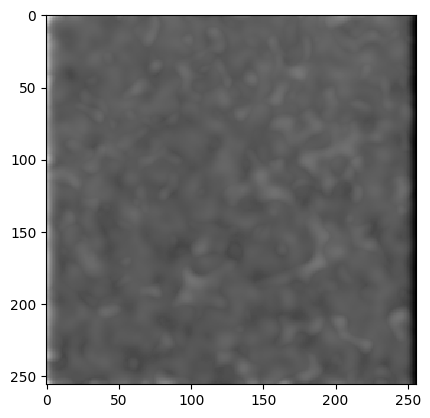

In [7]:
blurred = cle.gaussian_blur(image, sigma_x=4, sigma_y=4, sigma_z=4)
cle.imshow(blurred)

## Background subtraction
Also for background removal, e.g. uneven illumination correction, some filters are available.

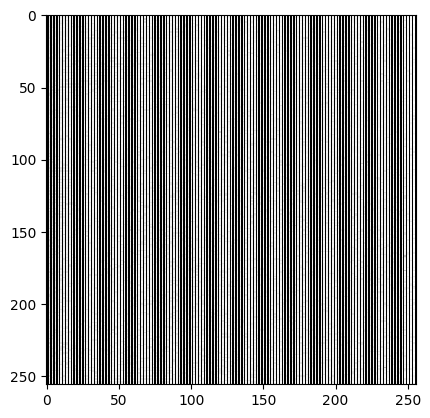

In [8]:
background_subtracted_DoG = cle.difference_of_gaussian(image, sigma2_x=10, sigma2_y=10, sigma2_z=10)
cle.imshow(background_subtracted_DoG)

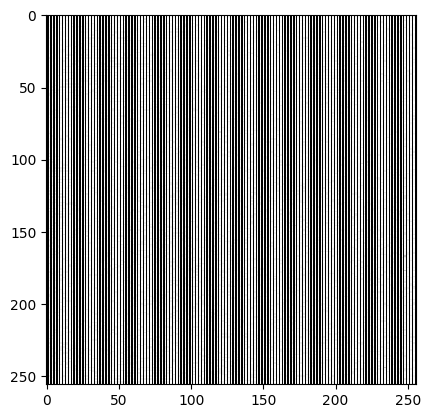

In [9]:
background_subtracted_TH = cle.top_hat_box(image, radius_x=10, radius_y=10, radius_z=10)
cle.imshow(background_subtracted_TH)